In [12]:
from sqlalchemy import create_engine
import pandas as pd

# Database connection parameters
DB_PARAMS = {
    "dbname": "bold_tracking",
    "user": "admin",
    "password": "CrazySecure",
    "host": "kaspersvendsen.dk",
    "port": "5432"
}

In [13]:

# Create the connection string
connection_string = (
    f"postgresql://{DB_PARAMS['user']}:{DB_PARAMS['password']}@"
    f"{DB_PARAMS['host']}:{DB_PARAMS['port']}/{DB_PARAMS['dbname']}"
)

# Create the SQLAlchemy engine
engine = create_engine(connection_string)



In [16]:
# Query ball_tracking table
query_ball_tracking = "SELECT * FROM ball_tracking;"
df_tracking_data = pd.read_sql(query_ball_tracking, engine)

# Display the first few rows of the ball_tracking table
print("Ball Tracking Table:")
print(df_tracking_data.head())


Ball Tracking Table:
                              time  frame_id  period     wall_clock   live  \
0 2025-01-27 17:28:26.211532+00:00      9441       1  1732453344240  False   
1 2025-01-27 17:28:26.211931+00:00      9442       1  1732453344280   True   
2 2025-01-27 17:28:26.212127+00:00      9443       1  1732453344320   True   
3 2025-01-27 17:28:26.212311+00:00      9444       1  1732453344360   True   
4 2025-01-27 17:28:26.212501+00:00      9445       1  1732453344400   True   

      x     y     z    spd  dist  
0  0.64  0.10  0.38  16.56  0.00  
1  1.30  0.35  0.38  16.37  0.71  
2  2.06  0.45  0.33  16.18  0.77  
3  2.74  0.62  0.35  16.00  0.70  
4  3.39  0.77  0.36  15.81  0.67  


In [17]:
# Query players table
query_players = "SELECT * FROM players;"
df_players = pd.read_sql(query_players, engine)

# Display the first few rows of the players table
print("Players Table:")
print(df_players.head())


Players Table:
                                     id  opta_id  team  number
0  037bde83-261d-4062-8ea8-a18a3e7f7ad0   592867  home      12
1  20369dd6-c959-427c-80ce-4c9b4d8bf888   226970  home      14
2  261c7d62-d32e-44c8-a728-5b62df237386   544773  home      11
3  2a5f69ac-5fbb-48f2-9f0b-f34f93bcb8c9   495068  home       8
4  2cccce55-d61b-4e71-8b42-29e11b1fb204   449395  home      28


In [18]:
# Query tracking_data table
query_tracking_data = "SELECT * FROM tracking_data;"
df_tracking_data = pd.read_sql(query_tracking_data, engine)

# Display the first few rows of the tracking_data table
print("Tracking Data Table:")
print(df_tracking_data.head())

Tracking Data Table:
                              time  frame_id  period     wall_clock   live  \
0 2025-01-27 17:28:26.211532+00:00    207687       1  1732453344240  False   
1 2025-01-27 17:28:26.211532+00:00    207688       1  1732453344240  False   
2 2025-01-27 17:28:26.211532+00:00    207689       1  1732453344240  False   
3 2025-01-27 17:28:26.211532+00:00    207690       1  1732453344240  False   
4 2025-01-27 17:28:26.211532+00:00    207691       1  1732453344240  False   

  possession                             player_id      x      y    z  spd  \
0       home  037bde83-261d-4062-8ea8-a18a3e7f7ad0  -0.23  -0.22  0.0  0.0   
1       home  20369dd6-c959-427c-80ce-4c9b4d8bf888 -16.13  11.35  0.0  0.0   
2       home  261c7d62-d32e-44c8-a728-5b62df237386  -0.11 -12.18  0.0  0.0   
3       home  2a5f69ac-5fbb-48f2-9f0b-f34f93bcb8c9   1.96  11.76  0.0  0.0   
4       home  2cccce55-d61b-4e71-8b42-29e11b1fb204   0.07 -28.20  0.0  0.0   

   dist  
0   0.0  
1   0.0  
2   0.0  
3

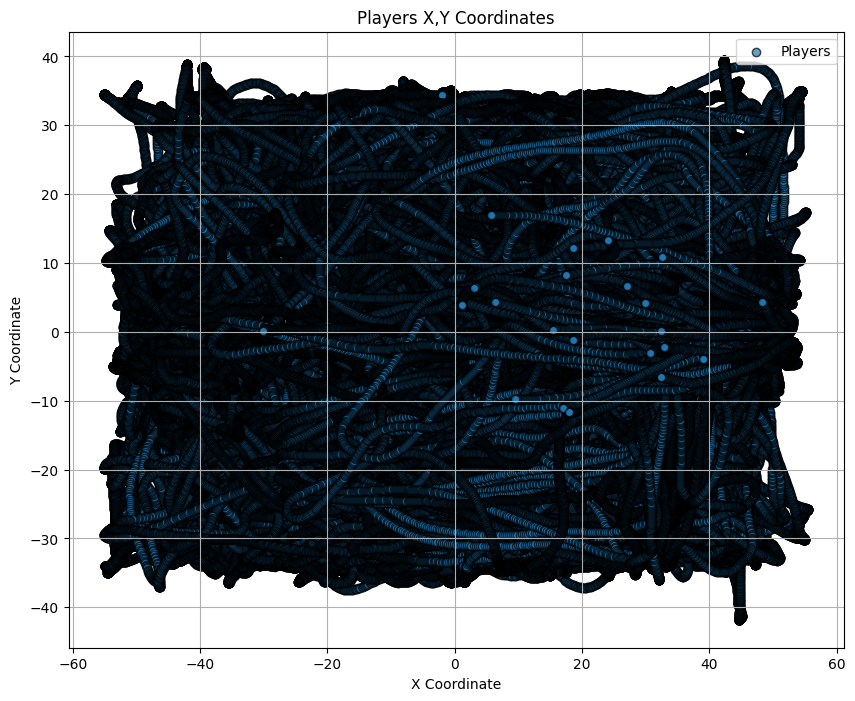

In [20]:
import matplotlib.pyplot as plt
# Query to fetch player coordinates
query = "SELECT player_id, x, y FROM tracking_data;"  # Adjust column names if necessary
df_players = pd.read_sql(query, engine)

# Plot the coordinates
plt.figure(figsize=(10, 8))
plt.scatter(df_players['x'], df_players['y'], alpha=0.7, edgecolors='k', label='Players')

# Adding labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Players X,Y Coordinates')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()